# Fingerprint distances distribution

In this notebook, we investigate the ranges of fingerprint distances for different feature weighting schemes.
Feature weighting schemes are denoted as follows: 

_\<physicochemical\>\<distances\>\<moments\>_

- $100$: Include only bits for physicochemical features (_physicochemical_)
- $010$: Include only bits for spatial distances features (_distances_)
- $001$: Include only bits for moments of spatial distances features (_moments_)
- $110$: Include only bits for physicochemical and distances (1:1)
- $101$: Include only bits for physicochemical and moments (1:1)
- $011$: Include only bits for distances and moments (1:1)
- $111$: Include all bits equally weighted by physicochemical, distances, and moments
- $15*1$: Include all bits equally by bit

__Note__: This notebook will take up to 8 GB of memory.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from kissim.comparison import FingerprintDistanceGenerator

In [3]:
HERE = Path(_dh[-1])  # noqa: F821
DATA = HERE / "../../results/"

In [4]:
plt.style.use("seaborn")

In [5]:
fingerprint_distances_files_dict = {
    "100": "fingerprint_distances_125-125-125-125-125-125-125-125-0-0-0-0-0-0-0.json",
    "010": "fingerprint_distances_0-0-0-0-0-0-0-0-250-250-250-250-0-0-0.json",
    "001": "fingerprint_distances_0-0-0-0-0-0-0-0-0-0-0-0-333-333-333.json",
    "110": "fingerprint_distances_62-62-62-62-62-62-62-62-125-125-125-125-0-0-0.json",
    "101": "fingerprint_distances_62-62-62-62-62-62-62-62-0-0-0-0-166-166-166.json",
    "011": "fingerprint_distances_0-0-0-0-0-0-0-0-125-125-125-125-166-166-166.json",
    "111": "fingerprint_distances_41-41-41-41-41-41-41-41-83-83-83-83-111-111-111.json",
    "15*1": "fingerprint_distances_66-66-66-66-66-66-66-66-66-66-66-66-66-66-66.json",
}

In [6]:
distances = {}
for weights_tag, file in fingerprint_distances_files_dict.items():
    print(file)
    print(f"Feature weights tag: {weights_tag}")
    fingerprint_distance_generator = FingerprintDistanceGenerator.from_json(DATA / file)
    dist_df = fingerprint_distance_generator.data
    print(f"Number of comparisons: {len(dist_df)}")
    dist_df = dist_df[
        ~dist_df.apply(
            lambda x: (x["structure1"] in [59, 7083]) or (x["structure2"] in [59, 7083]), axis=1
        )
    ]
    print(f"Number of comparisons: {len(dist_df)}")
    distances[weights_tag] = dist_df["distance"]

fingerprint_distances_125-125-125-125-125-125-125-125-0-0-0-0-0-0-0.json
Feature weights tag: 100
Number of comparisons: 12090903
Number of comparisons: 12081070
fingerprint_distances_0-0-0-0-0-0-0-0-250-250-250-250-0-0-0.json
Feature weights tag: 010
Number of comparisons: 12090903
Number of comparisons: 12081070
fingerprint_distances_0-0-0-0-0-0-0-0-0-0-0-0-333-333-333.json
Feature weights tag: 001
Number of comparisons: 12090903
Number of comparisons: 12081070
fingerprint_distances_62-62-62-62-62-62-62-62-125-125-125-125-0-0-0.json
Feature weights tag: 110
Number of comparisons: 12090903
Number of comparisons: 12081070
fingerprint_distances_62-62-62-62-62-62-62-62-0-0-0-0-166-166-166.json
Feature weights tag: 101
Number of comparisons: 12090903
Number of comparisons: 12081070
fingerprint_distances_0-0-0-0-0-0-0-0-125-125-125-125-166-166-166.json
Feature weights tag: 011
Number of comparisons: 12090903
Number of comparisons: 12081070
fingerprint_distances_41-41-41-41-41-41-41-41-83-8

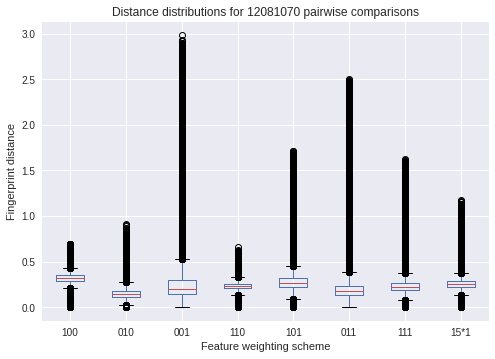

In [18]:
fig, ax = plt.subplots(1, 1)
pd.DataFrame(distances).plot(
    kind="box",
    ax=ax,
    title=f"Distance distributions for {distances['111'].shape[0]} pairwise comparisons",
)
ax.set_xlabel("Feature weighting scheme")
ax.set_ylabel("Fingerprint distance");

In [19]:
fig.savefig("results/feature_weighting_schemes.png", dpi=300)